# clase_01: Comandos básicos y gráficos en python

Que vamos a aprender hoy:
    
    - Comandos útiles para EDA

    - Descripcion del data-set
    
    - Histograma 
    
    - Datos categoricos
    
    - Box plot
 
    - Scatter Plot
    
    - Datos faltantes (missing data)

In [20]:
# Importamos librerias de manipulacion de datos
import pandas as pd
import numpy as np

# Importamos librerias de visualizacion de datos
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", color_codes=True)

import warnings 
warnings.filterwarnings("ignore")


In [5]:
iris = pd.read_csv('./Iris.csv')

In [6]:
#Vemos las dimensiones del dataset
iris.shape

(150, 6)

In [7]:
#Vemos que se haya importado correctamente
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Con el siguiente comando podemos ver el tipo de dato para cada una de las variables.
# Además nos indica si contienen nulos o no.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
# Podemos ver la distribución de la variable categórica por tipo de especie.
iris['Species'].value_counts(normalize=True,dropna=False)

Species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

Con el parámetro de "normalize" nos va a indicar la distribución en porcentaje para cada categoria.
Mientras que seteando como False al parámetro "dropna" nos va a traer a los nulos como una categoria extra.

In [10]:
# Como filtrar un dataframe segun las variables que necesitemos
list_vars = ["SepalLengthCm",	"SepalWidthCm",	"PetalLengthCm", "PetalWidthCm"]
iris[list_vars].head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [11]:
# Como obtener una fila particular en funcion de su indice
iris.iloc[2]  

Id                         3
SepalLengthCm            4.7
SepalWidthCm             3.2
PetalLengthCm            1.3
PetalWidthCm             0.2
Species          Iris-setosa
Name: 2, dtype: object

In [12]:
# Como puedo filtrar el dataset en funcion del valor de una columna?
sepallegth_5 = iris[iris["SepalLengthCm"]>5]
sepallegth_5.shape

(118, 6)

In [13]:
# Imprimimos los primeros registros de este dataset
sepallegth_5.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
10,11,5.4,3.7,1.5,0.2,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
15,16,5.7,4.4,1.5,0.4,Iris-setosa


In [14]:
sepallegth_5.Species.value_counts()

Species
Iris-virginica     49
Iris-versicolor    47
Iris-setosa        22
Name: count, dtype: int64

### Análisis descriptivo de los datos

In [15]:
# Vamos a ver la cantidad de nulos por variable de una manera diferente
miss_vars = pd.DataFrame(iris.isnull().mean(), columns=["Missings"])
miss_vars

,Missings
Id,0.0
SepalLengthCm,0.0
SepalWidthCm,0.0
PetalLengthCm,0.0
PetalWidthCm,0.0
Species,0.0


In [16]:
# Con este comando obtenemos algunas estadísticas descriptivas de los datos
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


## Veamos algunos gráficos

### Scatter plot

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

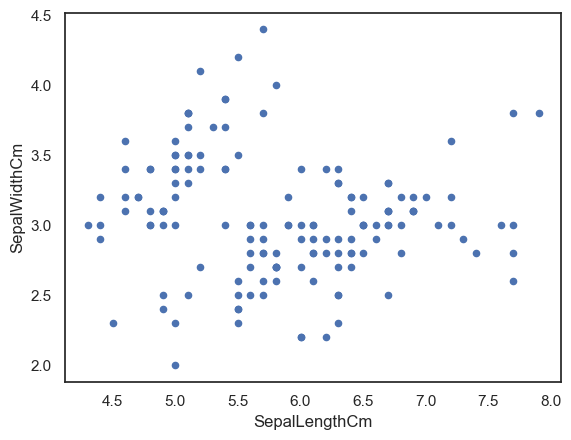

In [17]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

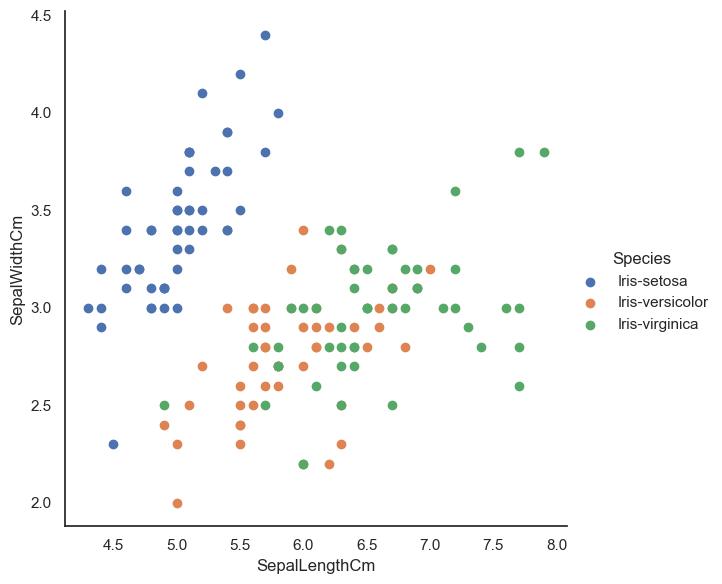

In [21]:
# Vemos como se distribuye segun el tipo de Especie
sns.FacetGrid(iris, hue="Species", height=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

### Histogramas

Text(0.5, 1.0, 'SepalLengthCm')

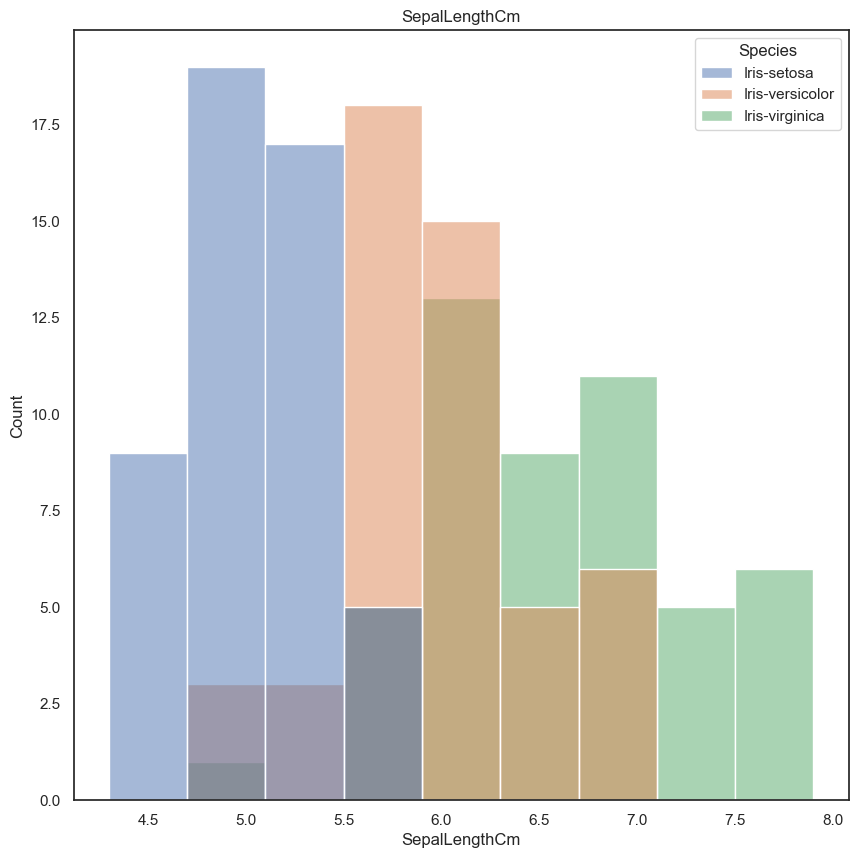

In [22]:
# Veamos la distribucion del Sepal Length segun la especie
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=iris, x='SepalLengthCm', hue='Species', stat='count', edgecolor=None)
ax.set_title('SepalLengthCm')

### Box Plot

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

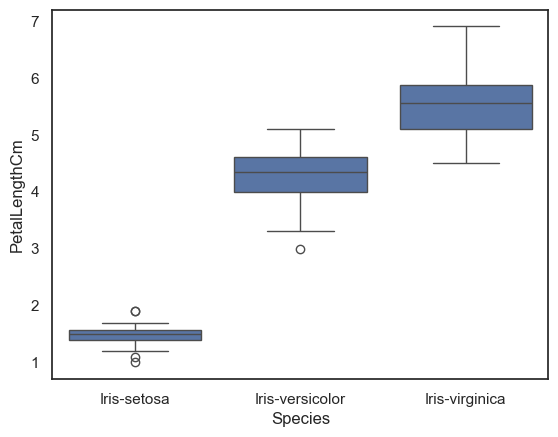

In [23]:
# Podemos ver la distribucion individuald de cada variable y a su vez sacar algunas conclusiones estadísticas
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

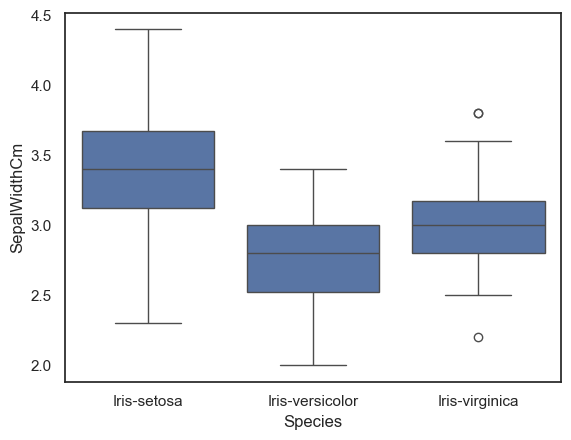

In [24]:
sns.boxplot(x="Species", y="SepalWidthCm", data=iris)

## Pairplot

Text(0.5, 1.03, 'Pairplot')

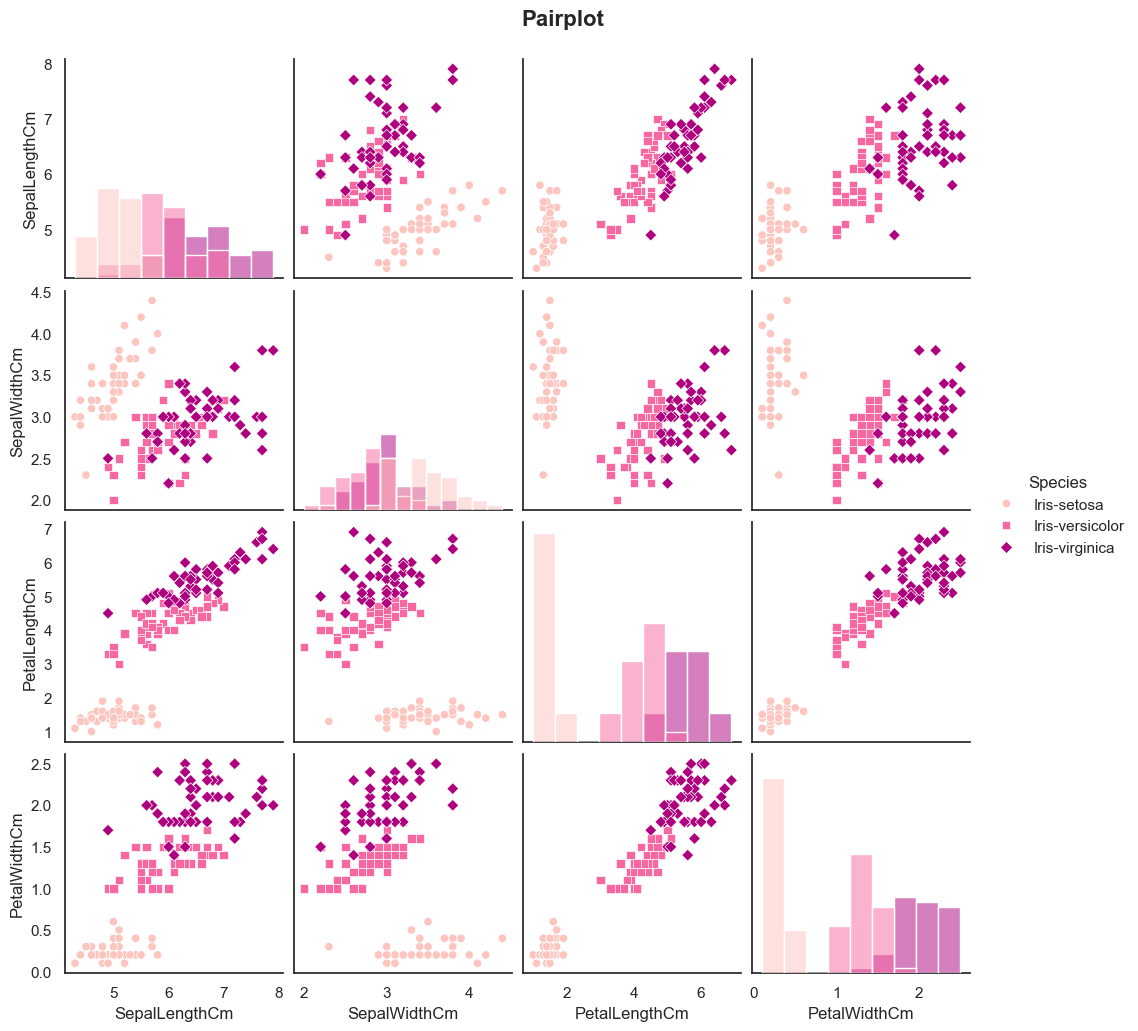

In [25]:
# Seteo de Tema
sns.set_style('white')
vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Creo el pairplot
pairplot = sns.pairplot(iris, hue = 'Species', diag_kind = 'hist', palette = 'RdPu', markers = ['o', 's', 'D'], 
                        vars = vars)

# Titulos
pairplot.fig.suptitle('Pairplot', fontweight = 'heavy', y = 1.03, fontsize = '16', 
                      fontfamily = 'sans-serif')